In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import cv2

import os
import random
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, 
    Dense, Dropout, 
    Flatten)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(os.listdir("/content/gdrive/My Drive/full_CBIS-DDSM dataset"))

['cancer', 'normal']


In [ ]:
IMG_SIZE = 128

In [ ]:
CATEGORIES = ['cancer', 'normal']
dataset = []

def generate_data():
    for category in CATEGORIES:
        path = f'/content/gdrive/My Drive/full_CBIS-DDSM dataset/{category}'
        class_id = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
                image_array = cv2.resize(image_array, (IMG_SIZE , IMG_SIZE))
                dataset.append([image_array, class_id])
            except Exception as e:
                print(e)
    random.shuffle(dataset)
                
generate_data()

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
data = []
labels = []
for features, label in dataset:
    data.append(features)
    labels.append(label)

In [ ]:
print(len(dataset))

1464


In [ ]:
data = []
labels = []
for features, label in dataset:
    data.append(features)
    labels.append(label)

In [ ]:
data = np.array(data)
data.reshape(-1, 128, 128, 3)

In [ ]:
pickle.dump(data, open("data1.pickle", "wb"))

pickle.dump(labels, open("labels1.pickle", "wb"))

In [ ]:
data = pickle.load(open("data1.pickle", "rb"))

labels = pickle.load(open("labels1.pickle", "rb"))

In [ ]:
train_data, data, train_labels, labels = train_test_split(data, 
                                                          labels,
                                                          test_size=0.2)

test_data, validation_data, test_labels, validation_labels = train_test_split(data, 
                                                                    labels,
                                                                    test_size=0.7)

ValueError: ignored

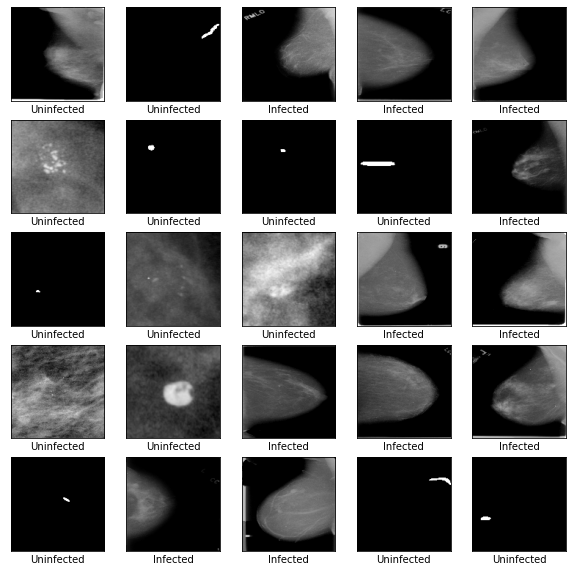

In [ ]:
plt.figure(figsize=(10, 10))
i = 0
for i in range(len(test_data)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i])
    if(test_labels[i] == 0):
        plt.xlabel('Infected')
    else:
        plt.xlabel('Uninfected')
    i += 1
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, 
    Dense, Dropout, 
    Flatten)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen_train = ImageDataGenerator(rescale=1./255,
                            rotation_range=45,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

datagen_test = ImageDataGenerator(rescale=1./255)
datagen_validation = ImageDataGenerator(rescale=1./255)

In [ ]:
datagen_train.fit(train_data)
datagen_test.fit(test_data)
datagen_test.fit(validation_data)

In [ ]:
model = Sequential([
      
       Flatten(),
       Dense(32, activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,3)) ,
       Dense(16,activation='relu'),
       Dropout(0.2),
       Dense(32, activation='relu'),
       Dense(32, activation='sigmoid'),
       Dropout(0.5),
       Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])



In [ ]:
BATCH_SIZE = 12
epochs = 30
#history = model.fit_generator(datagen_train.flow(train_data, train_labels, batch_size=BATCH_SIZE),
                  ## steps_per_epoch=8000 / BATCH_SIZE,
                  ## epochs=epochs,
                  # validation_data=datagen_validation.flow(validation_data, 
                   #                                  validation_labels, batch_size=BATCH_SIZE),
                    
                 #  )
history=model.fit(train_data, y=np.array(train_labels), batch_size=BATCH_SIZE,epochs=epochs,verbose=1,validation_data=(test_data, np.array(test_labels)))


Epoch 1/30
98/98 [==============================] - 1s 6ms/step - loss: 0.9234 - accuracy: 0.5047 - val_loss: 0.8369 - val_accuracy: 0.4483
Epoch 2/30
98/98 [==============================] - 1s 5ms/step - loss: 0.8462 - accuracy: 0.5235 - val_loss: 0.6901 - val_accuracy: 0.5057
Epoch 3/30
98/98 [==============================] - 0s 5ms/step - loss: 0.8077 - accuracy: 0.4816 - val_loss: 0.6812 - val_accuracy: 0.5287
Epoch 4/30
98/98 [==============================] - 0s 5ms/step - loss: 0.7154 - accuracy: 0.5662 - val_loss: 0.6627 - val_accuracy: 0.6552
Epoch 5/30
98/98 [==============================] - 0s 5ms/step - loss: 0.7361 - accuracy: 0.5329 - val_loss: 0.6416 - val_accuracy: 0.6667
Epoch 6/30
98/98 [==============================] - 1s 5ms/step - loss: 0.7145 - accuracy: 0.5380 - val_loss: 0.6746 - val_accuracy: 0.5172
Epoch 7/30
98/98 [==============================] - 1s 5ms/step - loss: 0.7179 - accuracy: 0.5175 - val_loss: 0.6733 - val_accuracy: 0.5287
Epoch 8/30
98/98 [==

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
#print(f'Validation Accuracy: {np.max(val_accuracy)}')
#print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.5824081897735596
Training Loss: 0.6754662394523621


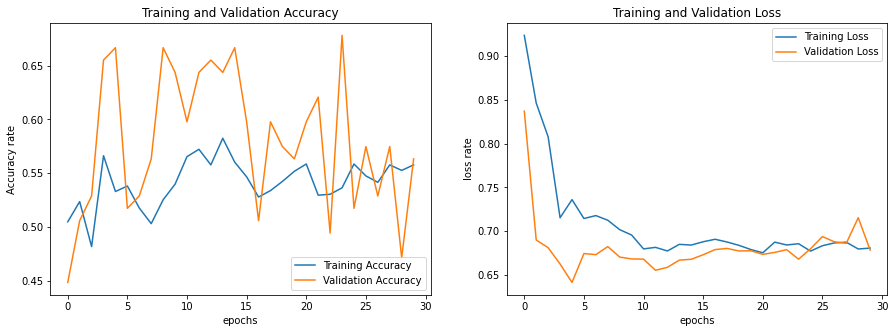

In [ ]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('Accuracy rate')
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss rate')
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
class_names = ['cancer', 'normal']
def plot_images(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]))

In [ ]:
random.shuffle(test_data)
predictions = model.predict(test_data)

ValueError: ignored

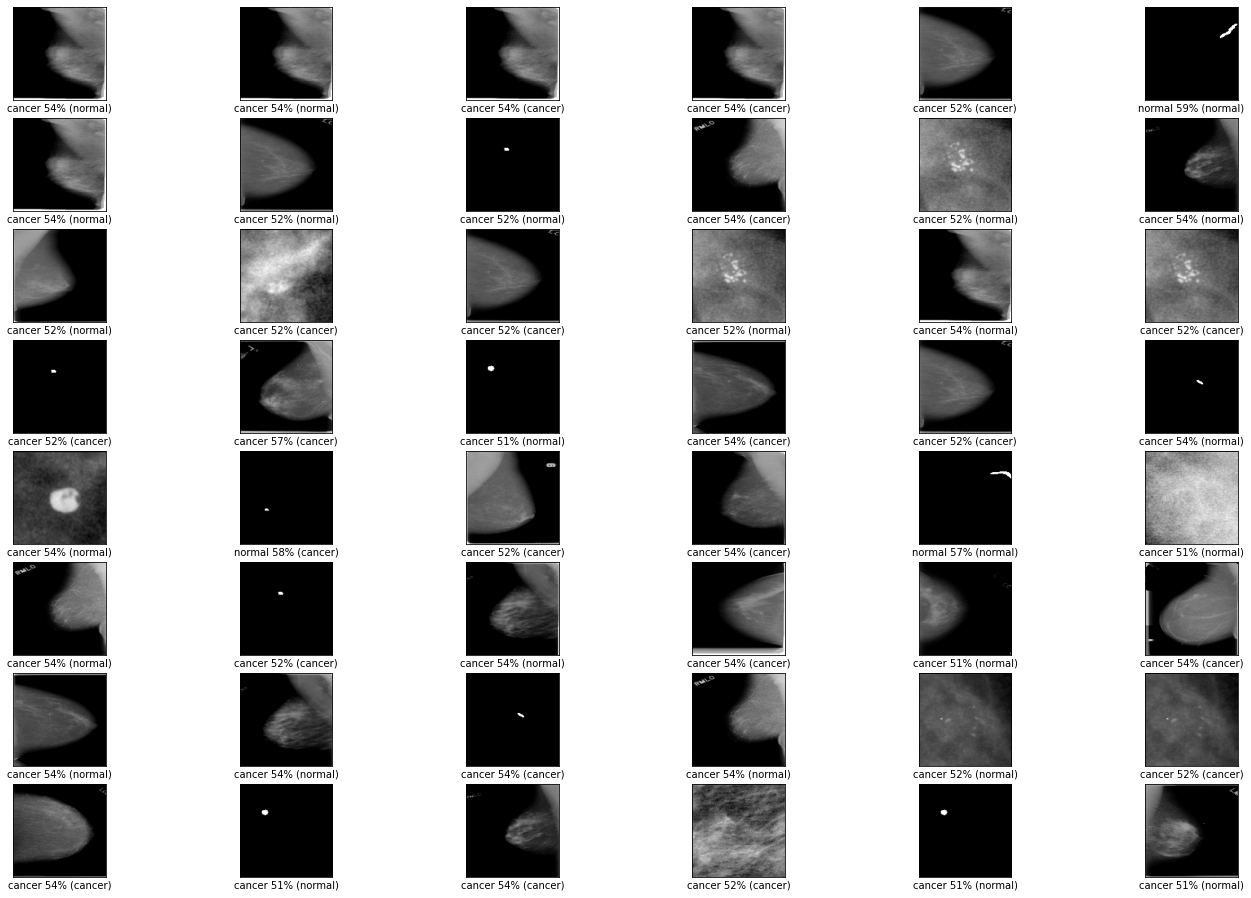

In [ ]:
num_rows = 8
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(test_data)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_images(i, predictions, test_labels, test_data)

In [ ]:
loss , accuracy = model.evaluate( test_data , np.array(test_labels) )
print( "Loss of {}".format( loss ) , "Accuracy of {} %".format( accuracy * 100 ) )

3/3 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4828
Loss of 0.6943246126174927 Accuracy of 48.27586114406586 %


In [ ]:
pred=model.predict( test_data).argmax( axis=-1 ) 
print(len(pred))
#pred.resize(9,1)
print ( pred )

87
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1]


In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
print('F1_score : ',f1_score(test_labels,pred))
print('sensitibity : ',metrics.recall_score(test_labels, pred))

F1_score :  0.11764705882352941
sensitibity :  0.06521739130434782


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.48      0.95      0.63        41
           1       0.60      0.07      0.12        46

    accuracy                           0.48        87
   macro avg       0.54      0.51      0.38        87
weighted avg       0.54      0.48      0.36        87



In [ ]:

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 
   

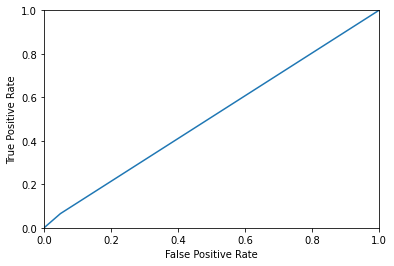

0.5082184517497349
0.0352532305554265


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_labels,pred)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_labels,pred) 
print(auc_score) 
print(matthews_corrcoef(test_labels,pred))